<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Регрессионный анализ. Методы регуляризации

## Регуляризация

Перед тем как углубиться в детали методов регуляризации, давайте разберемся с понятиями **переобучения (overfitting)** и **дообучения (fine-tuning)**.

### Дообучение (Fine-tuning)

**Дообучение** — это процесс, при котором уже обученная на определенных данных модель дополнительно обучается на новых данных. Это позволяет улучшить её производительность или адаптировать к новой задаче. В ходе дообучения модель становится способной лучше обобщать знания, полученные на предыдущем этапе. Однако, если модель слишком точно подстраивается под обучающие данные, она может переобучиться, что проявляется в снижении её результатов на новых данных. Например, если модель для классификации избыточно запоминает каждый пример из обучающей выборки, не улавливая общие закономерности, это приводит к плохим результатам на тестовых данных.

### Переобучение (Overfitting)

**Переобучение** — это явление, при котором модель слишком точно адаптируется к обучающим данным и теряет способность обобщать на новые, ранее не виденные примеры. В результате она может демонстрировать отличные результаты на обучающих данных, но при этом плохо справляться с новыми данными. Переобучение часто возникает, когда модель переобучается на новых данных или при работе с малым набором данных. Например, предварительно обученная нейронная сеть для распознавания изображений может быть дообучена на небольшом наборе данных для распознавания конкретных классов, что может привести к переобучению.

## Сложность модели

**Сложность модели** (*model complexity*) — это важный гиперпараметр, который влияет на её производительность. Для линейных моделей сложность может быть представлена количеством параметров, а для полиномиальных моделей — степенью полинома.

Сложность модели тесно связана с **ошибкой обобщения** (*generalization error*). Ошибка обобщения, в отличие от ошибки обучения, измеряемой на тренировочных данных, позволяет оценить способность модели к обобщению, то есть её способность давать точные ответы на ранее неизвестные данные. Слишком простая модель может не иметь достаточного количества параметров для захвата сложных закономерностей в данных, что приведёт к высокой ошибке обобщения. Напротив, избыточно сложная модель также будет иметь высокую ошибку обобщения, так как начнёт искать закономерности в шуме, демонстрируя высокую точность на тренировочных данных, но теряя обобщающую способность.

Параметры модели задают некоторую **аппроксимацию целевой функции**. Аппроксимацию можно выполнить несколькими способами:
1. Использовать все имеющиеся данные и провести функцию строго **через все известные точки** (обозначим как $f_1$);
2. Использовать более простую функцию (например, линейную), которая не проходит точно через все данные, но соответствует некоторым **общим закономерностям** (обозначим как $f_2$).

Характерной чертой переобучения является первый сценарий, который обычно сопровождается **большими весами**.

## Необходимость регуляризации

Хотя линейная регрессия представляется простой (в виде линии или гиперплоскости), она также может подвергаться переобучению, особенно в ситуациях, когда функции коррелируют или являются избыточными.

Предположим, есть два идентичных объекта, тогда наша прогнозируемая гиперплоскость будет выглядеть так:

$$
\hat{y} = w_0 + w_1x_1 + w_2x_2
$$

Если истинные значения $x_2$ практически совпадают с $x_1$ (или отличаются на некоторый мультипликативный коэффициент с шумом), то более разумно исключить термин $w_2 x_2$ и использовать:

$$
\hat{y} = w_0 + w_1x_1
$$


Это создаст более простую модель. Однако мы не можем заранее определить, являются ли $x_1$ и $x_2$ избыточными, и не хотим удалять параметры вручную. Вместо этого мы хотим, чтобы модель сама училась предпочитать более простую модель, которая все равно достаточно хорошо соответствует данным.

Для решения этих задач мы используем регуляризацию. Рассмотрим, как регуляризация может улучшить результаты линейной регрессии. На практике мы увидим, что по мере увеличения регуляризации (фактор $\alpha$) веса $w$ становятся меньше.



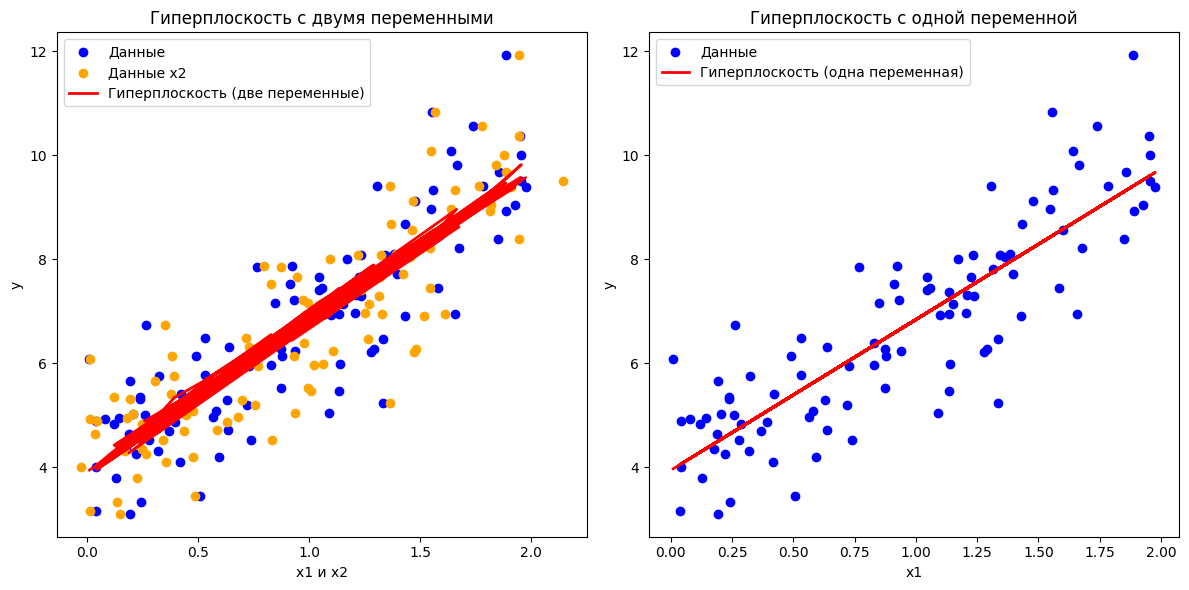

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Генерация искусственных данных
np.random.seed(0)
X1 = 2 * np.random.rand(100, 1)  # Переменная x1
X2 = X1 + np.random.normal(0, 0.1, X1.shape)  # Переменная x2, близкая к x1
y = 4 + 3 * X1 + np.random.randn(100, 1)  # Целевая переменная

# Модель с двумя переменными
model_2d = LinearRegression()
X_combined = np.hstack((X1, X2))
model_2d.fit(X_combined, y)

# Модель с одной переменной
model_1d = LinearRegression()
model_1d.fit(X1, y)

# Предсказания
y_pred_2d = model_2d.predict(X_combined)
y_pred_1d = model_1d.predict(X1)

# Визуализация
plt.figure(figsize=(12, 6))

# Подграфик 1: Гиперплоскость с двумя переменными
plt.subplot(1, 2, 1)
plt.scatter(X1, y, color='blue', label='Данные')
plt.scatter(X2, y, color='orange', label='Данные x2')
plt.plot(X1, y_pred_2d, color='red', linewidth=2, label='Гиперплоскость (две переменные)')
plt.title('Гиперплоскость с двумя переменными')
plt.xlabel('x1 и x2')
plt.ylabel('y')
plt.legend()

# Подграфик 2: Гиперплоскость с одной переменной
plt.subplot(1, 2, 2)
plt.scatter(X1, y, color='blue', label='Данные')
plt.plot(X1, y_pred_1d, color='red', linewidth=2, label='Гиперплоскость (одна переменная)')
plt.title('Гиперплоскость с одной переменной')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

Чтобы предотвратить переобучение в модели линейной регрессии, мы добавляем новое слагаемое в целевую функцию. В общем виде это можно выразить следующим образом:

$$
J(w) = \text{MSE} + \alpha \sum_{j=1}^{M} |w_j|^q
$$

Где:
- $J(w)$ — функция потерь с регуляризацией;
- MSE — среднеквадратичная ошибка;
- $w_j$ — $j$-й коэффициент модели;
- $M$ — количество признаков;
- $\alpha$ — параметр регуляризации, контролирующий силу штрафа;
- $q$ — параметр, определяющий соотношение между L1 и L2 регуляризацией. Если $q=2$, это соответствует L2 (Ridge), а если $q=1$, то L1 (Lasso).

Существует два основных типа регуляризации в линейной регрессии:
- **L1 (Lasso)** — регуляризация, способствующая разреженности модели, устанавливающая некоторые веса признаков в ноль, что позволяет проводить отбор признаков.
- **L2 (Ridge)** — регуляризация, которая штрафует большие значения всех весов, но не обнуляет их, что помогает бороться с мультиколлинеарностью и повышает обобщающую способность модели.



### Штраф L2 (или Ридж)

**L2-регуляризация** — это метод, применяемый в модели **Ридж-регрессии**, который помогает справляться с переобучением, добавляя штраф за большие значения весов в функцию потерь. Общая форма функции потерь с L2-регуляризацией выглядит следующим образом:

$$
E(w) = \frac{1}{2} \cdot \sum_{i=1}^{N} (t_i - w^T \phi(x_i))^2 + \frac{\lambda}{2} \sum_{j=1}^{M-1} |w_j|^2,
$$

где $\alpha = \frac{\lambda}{2}$.

Штраф L2 основан на **L2-норме** вектора весов $w$. Другими словами, функция потерь, включающая этот штраф, известна как **регрессия Риджа**.

#### Понимание функции потерь

Функция потерь — это то, что мы минимизируем в процессе обучения модели. Каждое добавление новых членов в функцию потерь подразумевает, что мы также хотим минимизировать эти члены (поэтому их называют **штрафными**). В данной функции мы стремимся, чтобы веса $w$ хорошо соответствовали данным (первый член), но при этом также минимизировались значения весов (второй член). Параметр $\lambda$ позволяет регулировать силу штрафа на веса. В библиотеке **scikit-learn** этот параметр называется $\alpha$, но это несущественно.

Выбор подходящего значения для $\lambda$ может быть сложной задачей. Обычно рекомендуется использовать логарифмическую сетку значений (например, 0.01, 0.1, 1, 10 и т. д.) и выбирать то значение, которое минимизирует потери на валидационном наборе данных. Низкое значение $\lambda$ подразумевает небольшие штрафы за сложные модели, и если $\lambda = 0$, мы получаем стандартную линейную регрессию. Высокое значение $\lambda$ же приводит к предпочтению более простых моделей, даже если это ухудшает соответствие данным.

#### Линейная алгебра и L2-регуляризация

Согласно линейной алгебре, если $w = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n \end{bmatrix}$ — многомерный вектор размерности $n \times 1$, то его транспонированный вектор $w^T = \begin{bmatrix} w_1 & w_2 & \cdots & w_n \end{bmatrix}$ будет вектором-строкой размерности $1 \times n$.

Таким образом, мы можем записать:

$$
w^T \times w = \begin{bmatrix} w_1 & w_2 & \cdots & w_n \end{bmatrix} \times \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n \end{bmatrix} = w_1^2 + w_2^2 + \cdots + w_n^2 = \sum_{i=1}^{N} w_i^2.
$$

Следовательно, $w^T \times w$ представляет собой сумму квадратов элементов вектора $w$ и равен квадрату нормы (длины) вектора $w$.

Таким образом, целевая функция $J(w)$ с учетом регуляризации примет вид:

$$
E(w) = \frac{1}{2} \cdot \sum_{i=1}^{N} (t_i - w^T \phi(x_i))^2 + \frac{\lambda}{2} w^T w.
$$

#### Вычисление градиента

Чтобы минимизировать функцию ошибки, необходимо найти градиент и приравнять его к нулю. Начнем с вычисления градиента:

$$
\frac{\partial E}{\partial w_j} = \frac{1}{2} \cdot \sum_{i=1}^{N} 2 \cdot (t_i - w^T \phi(x_i)) \cdot (-\phi_j(x_i)) + \frac{\lambda}{2} \cdot 2 \cdot w_j.
$$

Это можно упростить до:

$$
\frac{\partial E}{\partial w_j} = -\sum_{i=1}^{N} (t_i - w^T \phi(x_i)) \cdot \phi_j(x_i) + \lambda \cdot w_j.
$$

Теперь, градиент функции будет равен:

$$
\nabla_{w} E = -\sum_{i=1}^{N} (t_i - w^T \cdot \phi(x_i)) \cdot \phi(x_i) + \lambda \cdot w.
$$

Приравняв градиент к нулю, получаем уравнение для нахождения оптимальных весов модели:

$$
\nabla_{w} E = 0.
$$

Это уравнение позволяет найти оптимальные значения весов модели, минимизируя функцию ошибки с учетом регуляризации.

#### Переход к матричной форме

Для упрощения вычислений можно перейти от векторной формы уравнения к матричной. При транспонировании обеих частей уравнения $\nabla_{w} E = 0$, мы получаем:

$$
\nabla_{w} E^T = O^T.
$$

Этот подход помогает в анализе и решении уравнения для нахождения оптимальных весов модели.

#### Решение уравнения аналитически

Рассмотрим уравнение:

$$
-\sum_{i=1}^{N} (t_i - w^T \phi(x_i)) \cdot \phi_j(x_i) + \lambda \cdot w_j = 0.
$$

Транспонируем обе части равенства:

$$
\left(-\sum_{i=1}^{N} (t_i - w^T \phi(x_i)) \cdot \phi_j(x_i) + \lambda \cdot w_j\right)^T = O^T.
$$

Учитывая, что $(w^T \phi(x_i) - t_i)$ является скаляром, получаем:

$$
-\sum_{i=1}^{N} \phi(x_i)^T \cdot t_i + w^T \sum_{i=1}^{N} \phi(x_i) \cdot \phi(x_i)^T + \lambda \cdot w^T = O.
$$

#### Обозначения

Обозначим:

$$
\sum_{i=1}^{N} \phi(x_i) \cdot \phi(x_i)^T,
$$

где мы перемножаем вектор-столбец на вектор-строку. Если размеры совпадают, то получаем квадратную матрицу.

Если $\phi(x_i)$ — это вектор-столбец размерности $m \times 1$, а $\phi(x_i)^T$ — вектор-строка размерности $1 \times m$, то их произведение даст матрицу размерности $m \times m$:

$$
\phi(x_i) \cdot \phi(x_i)^T = \begin{bmatrix} \phi_1(x_i) \\ \phi_2(x_i) \\ \vdots \\ \phi_m(x_i) \end{bmatrix} \cdot \begin{bmatrix} \phi_1(x_i) & \phi_2(x_i) & \ldots & \phi_m(x_i) \end{bmatrix} = \begin{bmatrix} \phi_1(x_i)^2 & \phi_1(x_i)\phi_2(x_i) & \ldots & \phi_1(x_i)\phi_m(x_i) \\ \phi_2(x_i)\phi_1(x_i) & \phi_2(x_i)^2 & \ldots & \phi_2(x_i)\phi_m(x_i) \\ \vdots & \vdots & \ddots & \vdots \\ \phi_m(x_i)\phi_1(x_i) & \phi_m(x_i)\phi_2(x_i) & \ldots & \phi_m(x_i)^2 \end{bmatrix}.
$$

Таким образом, результат произведения вектора-столбца на вектор-строку дает квадратную матрицу.

Также рассмотрим:

$$
\sum_{i=1}^{N} t_i \cdot \phi(x_i)^T.
$$

С одной стороны:

$$
\sum_{i=1}^{N} t_i \cdot \phi(x_i)^T = \left(\sum_{i=1}^{N} t_i \cdot \phi_0(x_i), \sum_{i=1}^{N} t_i \cdot \phi_1(x_i), \ldots\right).
$$

С другой стороны:

$$
(t_1, t_2, \ldots, t_N) \cdot \begin{bmatrix} \phi_0(x_1) & \phi_1(x_1) & \phi_2(x_1) & \ldots & \phi_p(x_1) \\ \phi_0(x_2) & \phi_1(x_2) & \phi_2(x_2) & \ldots & \phi_p(x_2) \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ \phi_0(x_n) & \phi_1(x_n) & \phi_2(x_n) & \ldots & \phi_p(x_n) \end{bmatrix} = \left(\sum_{i=1}^{N} t_i \cdot \phi_0(x_i), \sum_{i=1}^{N} t_i \cdot \phi_1(x_i), \ldots\right).
$$

Следовательно:

$$
\sum_{i=1}^{N} t_i \cdot \phi(x_i)^T = t^T \cdot \Phi.
$$

#### Итоговое выражение

Итак, теперь можем записать:

$$
O^T = -\sum_{i=1}^{N} (t_i - w^T \cdot \phi(x_i)) \cdot \phi(x_i)^T + \lambda \cdot w^T = -\sum_{i=1}^{N} t_i \cdot \phi(x_i)^T + w^T \sum_{i=1}^{N} \phi(x_i) \cdot \phi(x_i)^T + \lambda \cdot w^T.
$$

Соберем всё вместе:

$$
-t^T \Phi + w^T \left(\Phi^T \Phi + \lambda I\right) = O.
$$

Отсюда получаем:

$$
t^T \Phi = w^T \left(\Phi^T \Phi + \lambda I\right).
$$

Из этого уравнения находим $w^T$:

$$
w^T = \left(\Phi^T \Phi + \lambda I\right)^{-1} \cdot \Phi t^T.
$$

И, соответственно, можно выразить $w$:

$$
w = \left(\left(\Phi^T \Phi + \lambda I\right)^{-1}\right)^T \cdot \left(\Phi t^T\right)^T.
$$

#### Транспонирование матриц

Согласно правилам линейной алгебры, транспонированная сумма матриц $A$ и $B$ равна сумме их транспонированных:

$$(A + B)^T = A^T + B^T.$$

Следовательно, имеем:

$$
w = \left(\Phi^T \Phi + \lambda I\right)^{-1} \cdot \Phi^T t.
$$

Таким образом, введение **L2-регуляризации** приводит к тому, что **большие веса больше штрафуются**, и в этом случае предпочтение отдается решениям с **малыми значениями весов**. Модель будет сохранять коррелированные и несущественные признаки с небольшими весами. Это связано с тем, что градиент L2-регуляризации определяется как:

$$
L'_{2w_i} = 2\alpha w_i,
$$

что "тянет" модель в сторону меньших значений весов, способствуя улучшению обобщающей способности модели.




### Штраф L1 (или Lasso)

**L1-регуляризация** (также известная как **Lasso-регрессия**) используется для борьбы с переобучением моделей, добавляя штраф за ненулевые значения весов. Формула функции потерь для модели Lasso выглядит следующим образом:

$$
E(w) = \frac{1}{2} \sum_{i=1}^{N} (t_i - w^T \phi(x_i))^2 + \lambda \sum_{j=1}^{M-1} |w_j|,
$$

где $\alpha = \lambda$.

#### Частные производные целевой функции

Для нахождения частной производной целевой функции $E(w)$ по весам $w_k$ в модели Lasso необходимо учитывать два случая: когда $w_k > 0$ и когда $w_k < 0$. В общем случае частная производная будет иметь вид:

$$
\frac{\partial E(w)}{\partial w_k} = -\sum_{i=1}^{N} (t_i - w^T \phi(x_i)) \phi_k(x_i) + \lambda \cdot \text{sign}(w_k),
$$

где:
- $\phi_k(x_i)$ — $k$-й признак объекта $x_i$,
- $\text{sign}(w_k)$ — функция знака веса $w_k$, которая равна $1$ при $w_k > 0$, $-1$ при $w_k < 0$ и $0$ при $w_k = 0$.

Таким образом, частная производная целевой функции по весам $w_k$ в модели Lasso учитывает градиент компоненты функции потерь и регуляризационный член.

### Сложность закрытого решения

Получить решение в закрытой форме для Lasso-регрессии сложнее, чем для L2-регуляризации. Это связано с тем, что L1-регуляризация приводит к разреженности, что делает модель более интерпретируемой, но затрудняет аналитическое решение. Однако, ее преимущества в отборе признаков и предотвращении переобучения делают Lasso весьма популярным методом.

### Линии уровня функции

**Линии уровня функции** — это кривые, которые соединяют точки с одинаковым значением функции на плоскости или в пространстве. Они позволяют визуализировать, как значение функции меняется в различных направлениях. Линии уровня часто используются для отображения поверхностей и функций в таких областях, как математика, физика и экономика.

Рассмотрим функцию двух переменных:

$$
f(x, y) = x^2 + y^2.
$$

Линии уровня этой функции представляют собой окружности с центром в начале координат. Например, для значения функции $f(x, y) = 1$ линии уровня будут представлять окружности радиусом 1 с центром в начале координат.

### Пример минимизации функций

Рассмотрим две функции:

1. $f(x) = x^2$
2. $g(x) = 2x$

Наша цель — минимизировать их сумму:

$$
h(x) = f(x) + g(x) = x^2 + 2x.
$$

Чтобы найти точку минимума, найдем производную функции $h(x)$ и приравняем её к нулю:

$$
h'(x) = 2x + 2 = 0 \Rightarrow x = -1.
$$

Таким образом, точка минимума функции $h(x)$ находится в точке $x = -1$. В этой точке обе функции $f(x)$ и $g(x)$ касаются, и их касательные будут параллельны, что иллюстрирует ситуацию, описанную в вашем вопросе.

### Применение регуляризации в регрессии

Если ваша регрессия имеет вид:

$$
t = w_0 + w_1 x + w_2 x^2,
$$

и вы применяете регуляризацию, передавая только $w_0$ и $w_1$, то у вас есть два варианта регуляризации:

1. **L1 (Lasso) регуляризация**:
   - Функция штрафа: $|w_1| + |w_2|$
   - Свойства:
     - Приводит к разреженности модели, так как может обнулить некоторые коэффициенты, что делает отбор признаков более эффективным.
     - Подходит для ситуаций, когда считается, что только некоторые признаки действительно важны, а остальные можно исключить.

2. **L2 (Ridge) регуляризация**:
   - Функция штрафа: $w_1^2 + w_2^2$
   - Свойства:
     - Не обнуляет коэффициенты, а скорее уменьшает их величину, что предотвращает переобучение.
     - Часто используется, когда все признаки считаются важными и требуется снизить влияние мультиколлинеарности.

### Выбор между L1 и L2

Выбор между L1 и L2 регуляризацией зависит от конкретной задачи и требований к модели. Если важно уменьшить количество признаков и сделать модель более интерпретируемой, то следует использовать L1 регуляризацию. В случаях, когда нужно предотвратить переобучение и учесть все признаки, чаще используют L2 регуляризацию.

### Визуализация L1 и L2

Если норма L2 равна 1, вы получаете единичный круг:

$$
w_0^2 + w_1^2 = 1.
$$

Таким образом, можно визуализировать уравнение $|w_1| + |w_2| = y$ в трехмерном графике, где $w_1$ и $w_2$ будут на осях, а $y$ будет представлено цветом или высотой поверхности.

Для интуитивного понимания того, как L1-регуляризация позволяет отбирать признаки, можно использовать графики. Голубая область на графике — это ограничение на значения весов, которое устанавливает регуляризация. Для **L2** это будет **окружность**, и минимальное значение функции потерь с регуляризацией будет находиться **на касательной к окружности**. Для **L1** ограничения на значения весов принимают форму ромба, и минимальное значение функции потерь с регуляризацией будет часто находиться в **углу ромба**, что соответствует **обнулению веса** одного из признаков.




Чтобы визуализировать эффекты L1 и L2 регуляризации, мы можем использовать библиотеку `matplotlib` для построения графиков. В этом примере я покажу, как можно создать график, который иллюстрирует контуры функции потерь с регуляризацией и области ограничения для L1 и L2 регуляризаций.

Давайте создадим визуализацию, которая показывает:

1. Контуры функции потерь.
2. Области регуляризации для L1 и L2.
3. Минимальные значения функции потерь.

Вот пример кода на Python:


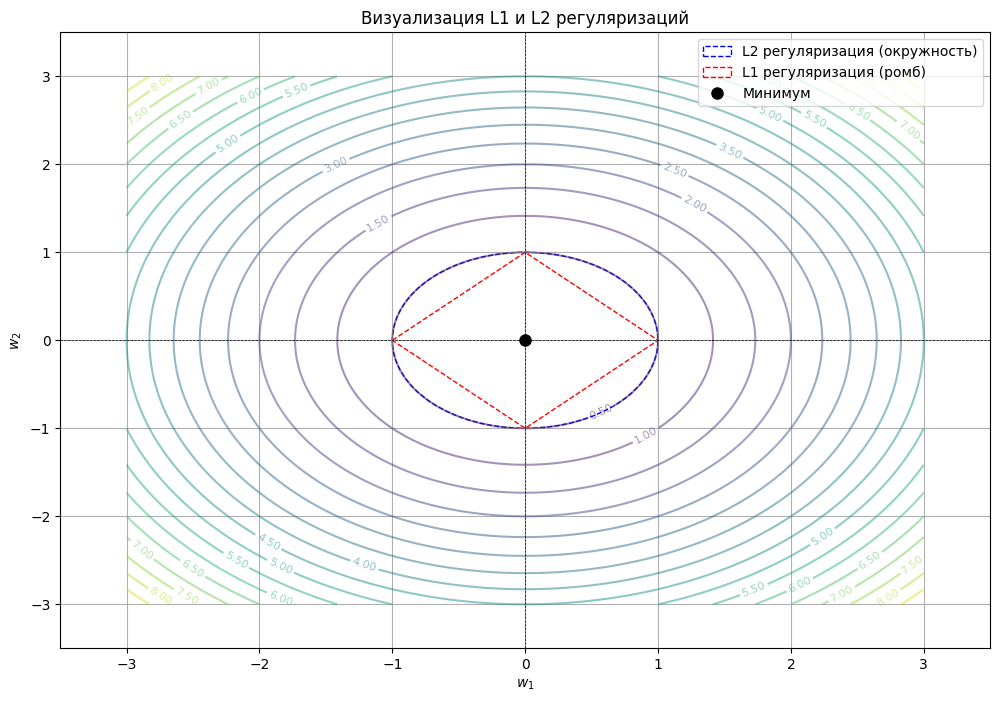

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем параметры для функции потерь
def loss_function(w1, w2):
    return (w1**2 + w2**2) / 2  # Функция потерь без регуляризации

# Определяем параметры для L1 и L2 регуляризаций
lambda_l1 = 1
lambda_l2 = 1

# Создаем сетку значений w1 и w2
w1 = np.linspace(-3, 3, 400)
w2 = np.linspace(-3, 3, 400)
W1, W2 = np.meshgrid(w1, w2)

# Вычисляем значения функции потерь
Z = loss_function(W1, W2)

# Создаем график
plt.figure(figsize=(12, 8))

# Контуры функции потерь
contour = plt.contour(W1, W2, Z, levels=20, cmap='viridis', alpha=0.5)
plt.clabel(contour, inline=True, fontsize=8, fmt="%.2f")

# Область L2 регуляризации (окружность)
l2_circle = plt.Circle((0, 0), lambda_l2, color='blue', fill=False, linestyle='--', label='L2 регуляризация (окружность)')
plt.gca().add_artist(l2_circle)

# Область L1 регуляризации (ромб)
l1_polygon = plt.Polygon([[-lambda_l1, 0], [0, lambda_l1], [lambda_l1, 0], [0, -lambda_l1]], color='red', fill=False, linestyle='--', label='L1 регуляризация (ромб)')
plt.gca().add_artist(l1_polygon)

# Минимальная точка
min_point = [0, 0]
plt.plot(min_point[0], min_point[1], 'ko', label='Минимум', markersize=8)

# Настройка графика
plt.title('Визуализация L1 и L2 регуляризаций')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()